In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [141]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [142]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


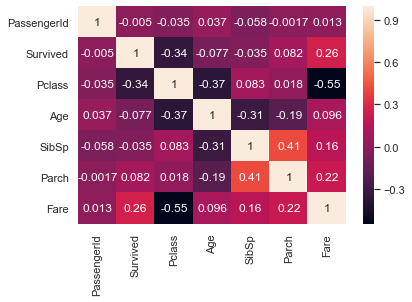

In [143]:
sns.heatmap(train.corr(), annot=True)

We can see that 'Survived' has high correlation with 'Pclass'(0.34) and 'Fare'(0.26) categories...

We can concluded that;

- the more money passengers pay, the higher probability of survival they have
- the lower class passengers belongs to, the lowest probability of survival they have

**MISSING VALUES**

In [144]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can see that 'Age', 'Cabin', 'Fare' and 'Embarked' features have null values,
- It is easy to fill Fare and Embarked because there are only 3 null values
- I think that Age is important feature for predict so we have to fill it logically
- I am not sure Cabin feature is important or not and there are many null values so we can explore it.

In [145]:
# fill 'Fare' and 'Embarked'

print(train['Embarked'].value_counts())
print(train[train['Embarked'].isnull()])

# We can see that we can fill two null values with 'S'

S    644
C    168
Q     77
Name: Embarked, dtype: int64
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [146]:
train['Embarked'].fillna('S', inplace=True)
print(train['Embarked'].value_counts())
print(train['Embarked'].isnull().sum())

S    646
C    168
Q     77
Name: Embarked, dtype: int64
0


In [147]:
print(test['Fare'].value_counts())
print(test[test['Fare'].isnull()])

# we can fill with Fare(mean) in Pclass = 3

7.7500      21
26.0000     19
8.0500      17
13.0000     17
7.8958      11
10.5000     11
7.7750      10
7.2292       9
7.2250       9
8.6625       8
7.8542       8
21.0000      8
26.5500      7
7.8792       6
27.7208      6
7.2500       5
7.9250       5
262.3750     5
211.5000     4
69.5500      4
14.5000      4
7.5500       4
7.7958       4
15.2458      4
55.4417      3
31.3875      3
31.5000      3
14.4542      3
9.5000       3
221.7792     3
            ..
50.4958      1
39.4000      1
34.3750      1
7.7208       1
7.8500       1
76.2917      1
7.7250       1
9.2250       1
39.6875      1
75.2500      1
13.8625      1
6.9500       1
61.1750      1
78.8500      1
20.2125      1
247.5208     1
7.5750       1
28.5375      1
227.5250     1
108.9000     1
6.4958       1
7.6292       1
47.1000      1
22.3583      1
17.4000      1
9.3250       1
14.4583      1
15.0333      1
25.4667      1
21.0750      1
Name: Fare, Length: 169, dtype: int64
     PassengerId  Pclass                Name   

In [148]:
test['Fare'].fillna(test.loc[(test['Pclass'] == 3),'Fare'].mean(), inplace=True)
print([test['Fare'].isnull().sum()])

[0]


# Now we can focus on null values in 'Age' feature

In [149]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [150]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [151]:
train.groupby(['Survived','Sex'])[['Age']].agg([np.mean,'std','count'])

# I want to fill Age values randomly, we can see from table that females who survived ages between (mean-std) (mean+std) 
# so we can fill null values randomly between two numbers 

Age                 
                      mean        std count
Survived Sex                               
0        female  25.046875  13.618591    64
         male    31.618056  14.056019   360
1        female  28.847716  14.175073   197
         male    27.276022  16.504803    93

In [152]:
# To learn how many null values in these groups I am doing this

train["Age"] = train["Age"].fillna(-0.5)

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train["Age_categories"] = pd.cut(train["Age"],cut_points,labels=label_names)

train.groupby(['Survived','Sex','Age_categories'])[['Age']].agg([np.mean,'count'])

Age      
                                     mean count
Survived Sex    Age_categories                 
0        female Missing         -0.500000    17
                Infant           2.200000     5
                Child            8.875000     8
                Teenager        16.833333     9
                Young Adult     25.788462    26
                Adult           43.687500    16
         male   Missing         -0.500000   108
                Infant           2.500000     8
                Child            9.000000     8
                Teenager        16.806452    31
                Young Adult     26.210256   195
                Adult           44.910891   101
                Senior          66.029412    17
1        female Missing         -0.500000    36
                Infant           3.156250    16
                Child            7.000000     3
                Teenager        16.185185    27
                Young Adult     27.111702    94
                Adult           45.148148    54
                Senior          62.666667     3
         male   Missing         -0.500000    16
                Infant           1.911333    15
                Child            9.166667     6
                Teenager        17.000000     3
                Young Adult     27.697674    43
                Adult           44.541667    24
                Senior          71.000000     2

In [153]:
rand_age1 = np.random.randint(25.046875 - 13.618591, 25.046875 + 13.618591, size = 17)
rand_age2 = np.random.randint(31.618056 - 14.056019, 31.618056 + 14.056019, size = 108)
rand_age3 = np.random.randint(28.847716 - 14.175073, 28.847716 + 14.175073, size = 36)
rand_age4 = np.random.randint(27.276022 - 16.504803, 27.276022 + 16.504803, size = 16)

rand_age1 = list(rand_age1)
rand_age2 = list(rand_age2)
rand_age3 = list(rand_age3)
rand_age4 = list(rand_age4)

In [154]:
train.loc[(train['Sex'] == 'female') & (train['Survived'] == 0) & (train['Age'] == -0.5),'Age'] = rand_age1
train.loc[(train['Sex'] == 'male') & (train['Survived'] == 0) & (train['Age'] == -0.5), 'Age'] = rand_age2
train.loc[(train['Sex'] == 'female') & (train['Survived'] == 1) & (train['Age'] == -0.5),'Age'] = rand_age3
train.loc[(train['Sex'] == 'male') & (train['Survived'] == 1) & (train['Age'] == -0.5), 'Age'] = rand_age4

In [155]:
test.groupby(['Sex'])[['Age']].agg([np.mean,'std','count'])

Age                 
             mean        std count
Sex                               
female  30.272362  15.428613   127
male    30.272732  13.389528   205

In [156]:
test["Age"] = test["Age"].fillna(-0.5)
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
test["Age_categories"] = pd.cut(test["Age"],cut_points,labels=label_names)
test.groupby(['Sex','Age_categories'])[['Age']].agg([np.mean,'count'])

Age      
                            mean count
Sex    Age_categories                 
female Missing         -0.500000    25
       Infant           1.298571     7
       Child           10.200000     5
       Teenager        17.250000    12
       Young Adult     25.620968    62
       Adult           46.540541    37
       Senior          66.750000     4
male   Missing         -0.500000    61
       Infant           1.782000     5
       Child            7.937500     8
       Teenager        16.147059    17
       Young Adult     25.963964   111
       Adult           44.535088    57
       Senior          62.642857     7

In [157]:
rand_age1 = np.random.randint(30.272362 - 15.428613, 30.272362 + 15.428613, size = 25)
rand_age2 = np.random.randint(30.272732 - 13.389528, 30.272732 + 13.389528, size = 61)

rand_age1 = list(rand_age1)
rand_age2 = list(rand_age2)

test.loc[(test['Sex'] == 'female') & (test['Age'] == -0.5), 'Age'] = rand_age1
test.loc[(test['Sex'] == 'male') & (test['Age'] == -0.5), 'Age'] = rand_age2

## After filling AGE values we can focus CABIN

In [158]:
train["Cabin_type"] = train["Cabin"].str[0]
train["Cabin_type"] = train["Cabin_type"].fillna("Unknown")

test["Cabin_type"] = test["Cabin"].str[0]
test["Cabin_type"] = test["Cabin_type"].fillna("Unknown")

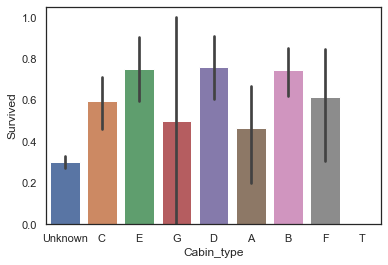

In [159]:
sns.barplot(x = 'Cabin_type',y ='Survived',data=train)

### After looking plot I am thinking that 'Cabin' feature is not important to predict Survived I want to drop it

In [160]:
train.drop(['Cabin','Cabin_type'], axis=1, inplace=True)
test.drop(['Cabin','Cabin_type'], axis=1, inplace=True)

In [161]:
# finally end of fill null values

print(train.isnull().sum())
print(test.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Age_categories    0
dtype: int64
PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Age_categories    0
dtype: int64


In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


## Now we can check the other columns

In [162]:
# I think Name and Ticket features are not necessary for us so we can drop them.

train.drop(['Name','Ticket'], axis=1, inplace=True)
test.drop(['Name','Ticket'], axis=1, inplace=True)

In [163]:
# We can apply one hot encoding method to ['Pclass','Sex','Embarked','Age_categories'] features because they have categoric values

train["Pclass"] = train["Pclass"].astype("category")
train = pd.get_dummies(train, columns = ["Pclass"],prefix="Pc")

test["Pclass"] = test["Pclass"].astype("category")
test = pd.get_dummies(test, columns = ["Pclass"],prefix="Pc")

In [164]:
from sklearn import preprocessing

lbe = preprocessing.LabelEncoder()
train["Sex"] = lbe.fit_transform(train["Sex"])
test["Sex"] = lbe.fit_transform(test["Sex"])

In [165]:
bins = [0, 5, 12, 18, 24, 35, 60, 100]
mylabels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = mylabels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = mylabels)

In [166]:
# Map each Age value to a numerical value:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [167]:
train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Age_categories,Pc_1,Pc_2,Pc_3,AgeGroup
0,1,0,1,22.0,1,0,7.2500,S,Young Adult,0,0,1,4
1,2,1,0,38.0,1,0,71.2833,C,Adult,1,0,0,6
2,3,1,0,26.0,0,0,7.9250,S,Young Adult,0,0,1,5
3,4,1,0,35.0,1,0,53.1000,S,Young Adult,1,0,0,5
4,5,0,1,35.0,0,0,8.0500,S,Young Adult,0,0,1,5


In [168]:
train.drop(['Age_categories'], axis=1, inplace=True)
test.drop(['Age_categories'], axis=1, inplace=True)

In [169]:
# Map Fare values into groups of numerical values:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [170]:
train["Embarked"] = train["Embarked"].astype("category")
train = pd.get_dummies(train, columns = ["Embarked"],prefix="")

test["Embarked"] = test["Embarked"].astype("category")
test = pd.get_dummies(test, columns = ["Embarked"],prefix="")

In [171]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [172]:
train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pc_1,Pc_2,Pc_3,AgeGroup,FareBand,_C,_Q,_S,FamilySize
0,1,0,1,22.0,1,0,7.2500,0,0,1,4,1,0,0,1,2
1,2,1,0,38.0,1,0,71.2833,1,0,0,6,4,1,0,0,2
2,3,1,0,26.0,0,0,7.9250,0,0,1,5,2,0,0,1,1
3,4,1,0,35.0,1,0,53.1000,1,0,0,5,4,0,0,1,2
4,5,0,1,35.0,0,0,8.0500,0,0,1,5,2,0,0,1,1


In [173]:
train.drop(['SibSp','Parch'], axis=1, inplace=True)
test.drop(['SibSp','Parch'], axis=1, inplace=True)

In [174]:
train.head()

,PassengerId,Survived,Sex,Age,Fare,Pc_1,Pc_2,Pc_3,AgeGroup,FareBand,_C,_Q,_S,FamilySize
0,1,0,1,22.0,7.2500,0,0,1,4,1,0,0,1,2
1,2,1,0,38.0,71.2833,1,0,0,6,4,1,0,0,2
2,3,1,0,26.0,7.9250,0,0,1,5,2,0,0,1,1
3,4,1,0,35.0,53.1000,1,0,0,5,4,0,0,1,2
4,5,0,1,35.0,8.0500,0,0,1,5,2,0,0,1,1


In [175]:
test.head()

,PassengerId,Sex,Age,Fare,Pc_1,Pc_2,Pc_3,AgeGroup,FareBand,_C,_Q,_S,FamilySize
0,892,1,34.5,7.8292,0,0,1,5,1,0,1,0,1
1,893,0,47.0,7.0000,0,0,1,6,1,0,0,1,2
2,894,1,62.0,9.6875,0,1,0,7,2,0,1,0,1
3,895,1,27.0,8.6625,0,0,1,5,2,0,0,1,1
4,896,0,22.0,12.2875,0,0,1,4,2,0,0,1,3


# LOGISTIC REGRESSION

In [176]:
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [177]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

In [178]:
def split_loj_data(df):
    predictors = df.drop(['Survived', 'PassengerId'], axis=1)
    target = df["Survived"]
    X_train, X_test, y_train, y_test = train_test_split(predictors, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 0)
    loj_model = LogisticRegression().fit(X_train,y_train)
    y_pred = loj_model.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(cross_val_score(loj_model, X_test, y_test, cv = 10).mean())

## HICBIRSEY DEGISTIRMEDEN

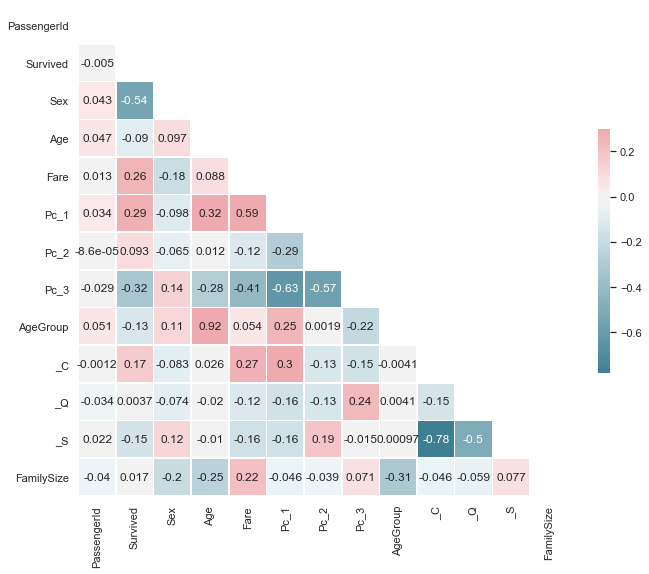

In [179]:
columns = train.columns
plot_correlation_heatmap(train[columns])

In [180]:
split_loj_data(train)

0.8212290502793296
0.7990196078431373


## DROP AgeGroup	FareBand 

In [181]:
train1 = train.drop(['AgeGroup','FareBand'], axis=1)

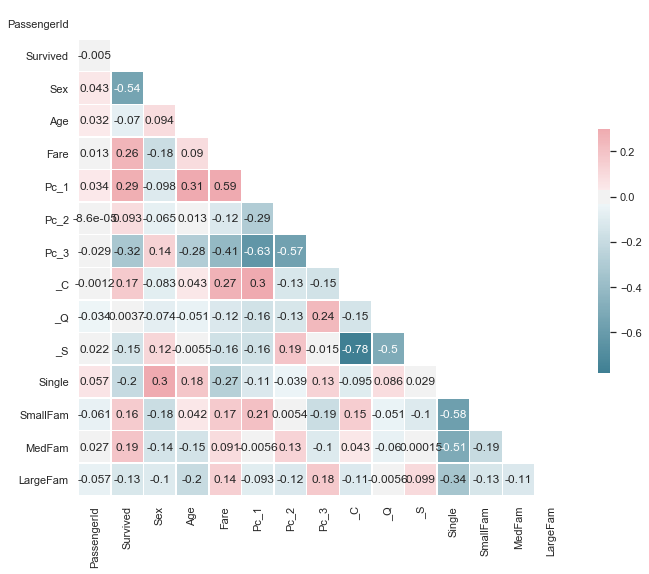

In [91]:
columns = train1.columns
plot_correlation_heatmap(train1[columns])

In [182]:
split_loj_data(train1)

0.8268156424581006
0.8215686274509804


## DROP Age	Fare

In [183]:
train2 = train.drop(['Age','Fare'], axis=1)

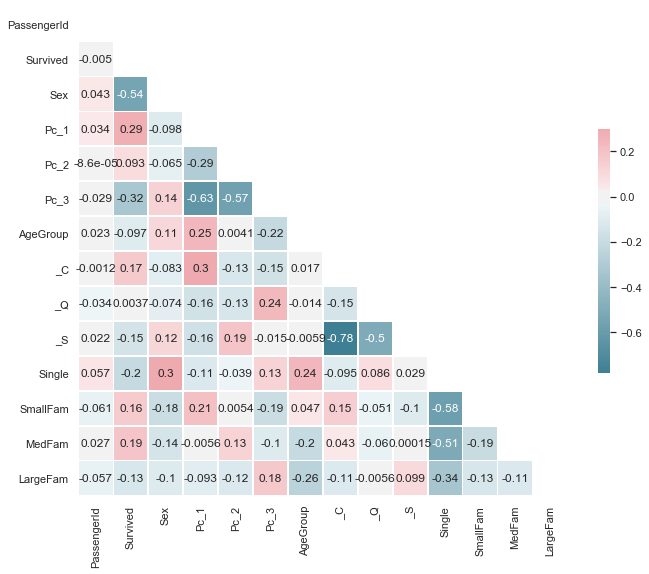

In [94]:
columns = train2.columns
plot_correlation_heatmap(train2[columns])

In [184]:
split_loj_data(train2)

0.8156424581005587
0.8212418300653594


## drop correlation 0.5 from train1

In [185]:
train3 = train1.drop(['Pc_3','_S'], axis=1)

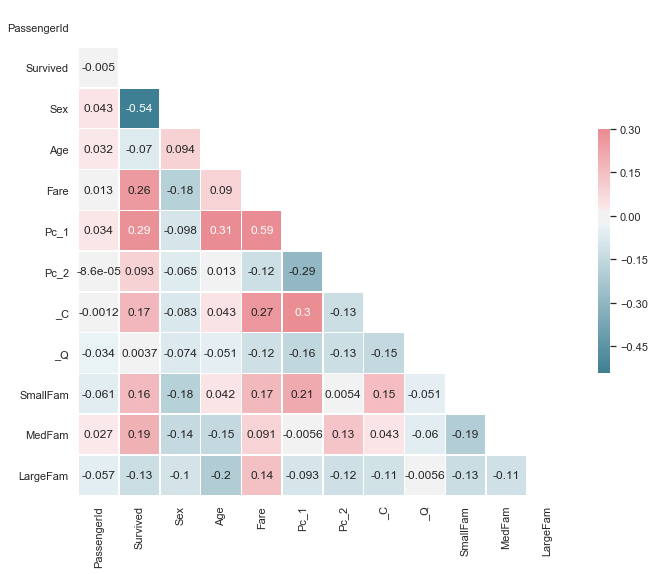

In [97]:
columns = train3.columns
plot_correlation_heatmap(train1[columns])

In [186]:
split_loj_data(train3)

0.8268156424581006
0.8049019607843138


## drop correlation 0.5 from train2

In [187]:
train4 = train2.drop(['Pc_3','_S'], axis=1)

In [188]:
split_loj_data(train4)

0.8156424581005587
0.8101307189542484


## EN YUKSEK TRAIN1

In [189]:
test1 = test.drop(['AgeGroup','FareBand'], axis=1)

In [190]:
predictors = train1.drop(['Survived', 'PassengerId'], axis=1)
target = train1["Survived"]
X_train, X_test, y_train, y_test = train_test_split(predictors, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 0)
loj_model = LogisticRegression().fit(X_train,y_train)

In [191]:
y_pred = loj_model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))
print(cross_val_score(loj_model, X_test, y_test, cv = 10).mean())

0.8268156424581006
0.8215686274509804


In [127]:
predictors = train7.drop(['Survived', 'PassengerId'], axis=1)
target = train7["Survived"]
X_train, X_test, y_train, y_test = train_test_split(predictors, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 0)
loj_model = LogisticRegression().fit(X_train,y_train)

In [193]:
#burada bütün modelleri ımport ediyoruz.
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

#burada modelleri bir listenin içerisine alıp parametreleri ile beraber tanımlıyoruz.
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('MLPClassifier', MLPClassifier()))

#burada bir döngü vasıtasıyla tek tek bütün modelleri deneyerek sonuçları karşılaştırıyoruz. 
for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn import metrics

    print("%s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_test, y_pred)*100))

Logistic Regression -> ACC: %82.68
Naive Bayes -> ACC: %81.01
Decision Tree (CART) -> ACC: %81.56
K-NN -> ACC: %72.07
SVM -> ACC: %71.51
Gradient Boosting Classifier -> ACC: %83.24
AdaBoostClassifier -> ACC: %80.45
BaggingClassifier -> ACC: %84.36
RandomForestClassifier -> ACC: %84.36
MLPClassifier -> ACC: %81.01


In [195]:
#set ids as PassengerId and predict survival 
ids = test1['PassengerId']
predictions =loj_model.predict(test1.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

### KAGGLE SCORE : 0.75598